In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import Counter
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [38]:
US_df = pd.read_csv("cleaned_US2021.csv", index_col=0)
US_df.head()

,Unnamed: 0.1,title,score,id,url,coms_num,author,upvotes,word_count
0,0,st. paul ‘sovereign citizen’ records himself s...,1764,naxke1,https://minnesotareformer.com/2021/05/08/st-pa...,219,zardogo,1764,10
1,1,district keeps kids at home because of lack of...,73,naywl0,https://apnews.com/article/coronavirus-pandemi...,3,brashendeavors,73,11
2,2,tacoma man says he was stabbed after asking so...,2660,nab3az,https://www.kiro7.com/news/local/tacoma-man-sa...,599,DICK-FUCK-PUSSY-SUCK,2660,13
3,3,israeli air strike destroys gaza tower block,342,na47s3,https://www.aljazeera.com/news/2021/5/11/israe...,285,throwaway0152384,342,7
4,4,elon musk says tesla will stop accepting bitco...,4068,nb17cy,https://www.cnbc.com/2021/05/12/elon-musk-says...,860,FletchForPresident,4068,14


In [39]:
titles = " ".join(US_df["title"])
words = word_tokenize(titles)

In [40]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [41]:
lowered = clean_words(words)

In [42]:
bow = Counter(lowered)

In [43]:
data = pd.DataFrame(bow.items(), columns=["word", "frequency"]).sort_values(by="frequency", ascending=False)

In [44]:
data = data.head(30)

Text(0.5, 1.0, 'Top30 Words Appeared in US news')

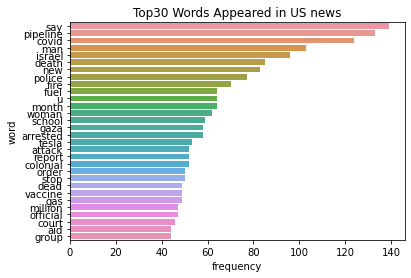

In [45]:
sns.barplot(x="frequency", y="word", data=data).set_title("Top30 Words Appeared in US news")

In [13]:
World_df = pd.read_csv("World2021.csv", index_col=0)
World_df.head()

,title,score,id,url,coms_num,author,upvotes
0,Bosnian Serb ex-leader Karadzic to serve genoc...,44,naup26,https://www.aljazeera.com/news/2021/5/12/bosni...,https://www.aljazeera.com/news/2021/5/12/bosni...,vokiel,44
1,Taiwan computer brand wiped from mainland Chin...,32,nb3z2v,https://www.scmp.com/tech/tech-trends/article/...,https://www.scmp.com/tech/tech-trends/article/...,ccpshrilldetective,32
2,"""A Hell Out Here"": COVID-19 Ravages Rural India",11,nbcuse,https://www.ndtv.com/india-news/a-hell-out-her...,https://www.ndtv.com/india-news/a-hell-out-her...,Revolutionary_Ant852,11
3,Federal budget 2021: Foreign aid cut against n...,3,nbafrh,https://www.news.com.au/finance/economy/federa...,https://www.news.com.au/finance/economy/federa...,kamikkazet,3
4,Weary Gaza marks Muslim feast as violence spre...,17,nbdzub,https://apnews.com/article/middle-east-israel-...,https://apnews.com/article/middle-east-israel-...,GDW312,17


In [14]:
titles = " ".join(World_df["title"])
words = word_tokenize(titles)

In [15]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [16]:
lowered = clean_words(words)

In [17]:
bow = Counter(lowered)

In [18]:
data = pd.DataFrame(bow.items(), columns=["word", "frequency"]).sort_values(by="frequency", ascending=False)

In [19]:
data = data.head(30)

Text(0.5, 1.0, 'Top30 Words Appeared in World News ')

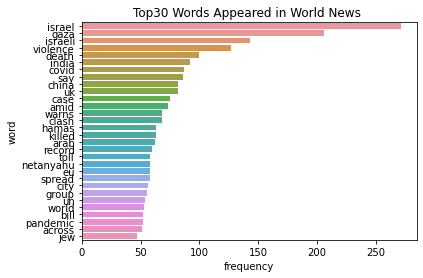

In [20]:
sns.barplot(x="frequency", y="word", data=data).set_title("Top30 Words Appeared in World News ")

In [21]:
def word_frequency(sentence):
    sentence = " ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2 = Counter(ngrams(new_tokens, 2))
    counted_3 = Counter(ngrams(new_tokens, 3))
    bigrams = pd.DataFrame(counted_2.items(), columns=["bigrams", "frequency"]).sort_values(by="frequency", ascending=False)
    trigrams = pd.DataFrame(counted_3.items(), columns=["trigrams", "frequency"]).sort_values(by="frequency", ascending=False)
    return bigrams, trigrams

In [22]:
data2, data3 = word_frequency(World_df['title'])

Text(0.5, 1.0, 'Top30 Trigrams in World News')

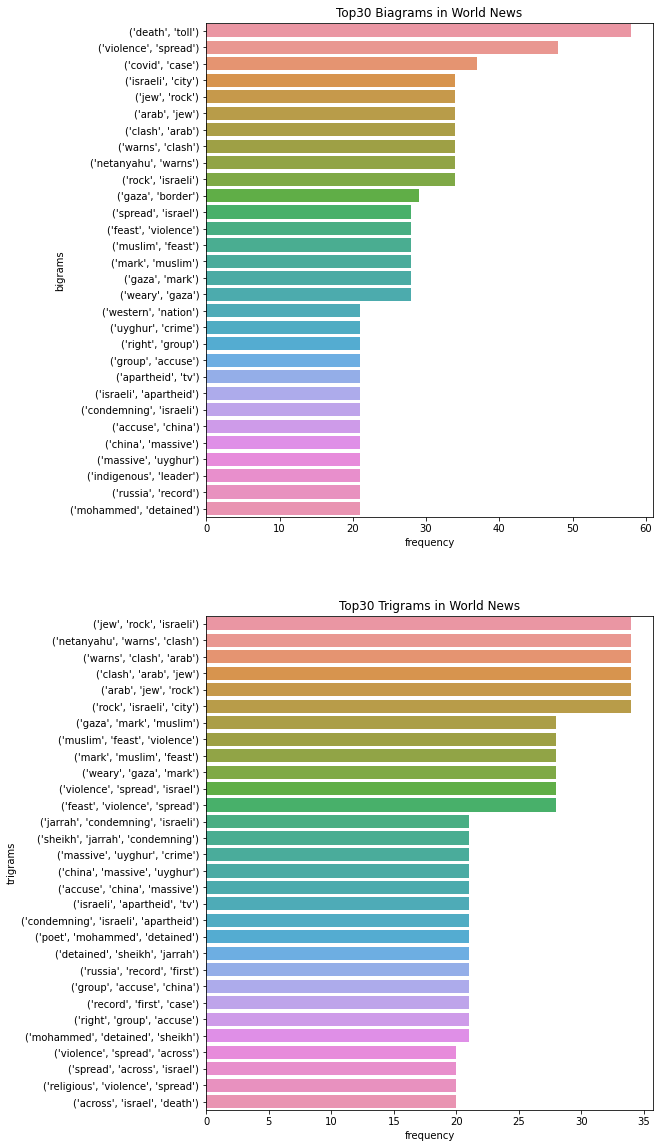

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(8,20))
sns.barplot(ax=axes[0], x='frequency', y='bigrams', data=data2.head(30)).set_title("Top30 Biagrams in World News")
sns.barplot(ax=axes[1], x='frequency', y='trigrams', data=data3.head(30)).set_title("Top30 Trigrams in World News")


In [25]:
data2, data3 = word_frequency(US_df['title'])

Text(0.5, 1.0, 'Top30 Trigrams in US News')

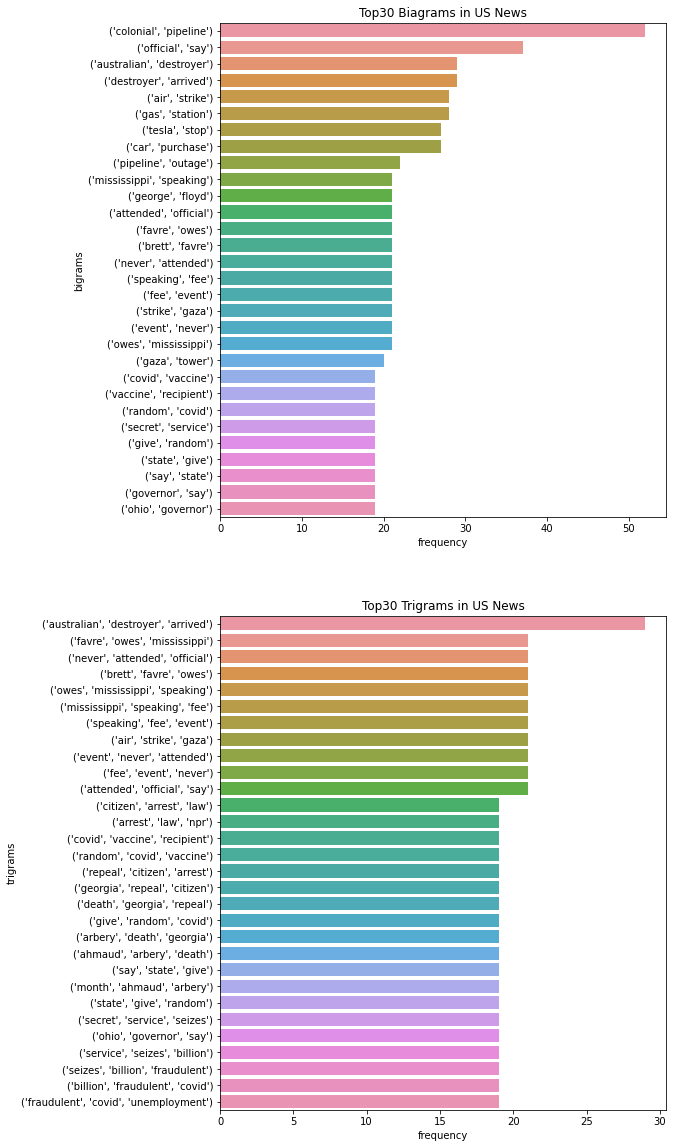

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(8,20))
sns.barplot(ax=axes[0], x='frequency', y='bigrams', data=data2.head(30)).set_title("Top30 Biagrams in US News")
sns.barplot(ax=axes[1], x='frequency', y='trigrams', data=data3.head(30)).set_title("Top30 Trigrams in US News")

In [29]:
US_df = pd.read_csv("cleaned_US2021.csv")
US_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1500 non-null   int64 
 1   Unnamed: 0.1  1500 non-null   int64 
 2   title         1500 non-null   object
 3   score         1500 non-null   int64 
 4   id            1500 non-null   object
 5   url           1500 non-null   object
 6   coms_num      1500 non-null   int64 
 7   author        1500 non-null   object
 8   upvotes       1500 non-null   int64 
 9   word_count    1500 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 117.3+ KB


In [46]:
World_df = pd.read_csv("cleaned_WN2021.csv")
World_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1497 non-null   int64 
 1   Unnamed: 0.1  1497 non-null   int64 
 2   title         1497 non-null   object
 3   score         1497 non-null   int64 
 4   id            1497 non-null   object
 5   url           1497 non-null   object
 6   coms_num      1497 non-null   object
 7   author        1497 non-null   object
 8   upvotes       1497 non-null   int64 
 9   word_count    1497 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 117.1+ KB


In [52]:
print(US_df["coms_num"].describe())
print(US_df["upvotes"].describe())
print(US_df["score"].describe())

count    1500.000000
mean      276.163333
std       777.940656
min         0.000000
25%        15.000000
50%        40.000000
75%       228.000000
max      7605.000000
Name: coms_num, dtype: float64
count     1500.00000
mean      2817.58200
std       9445.22201
min          0.00000
25%         59.00000
50%        171.00000
75%       1233.00000
max      73595.00000
Name: upvotes, dtype: float64
count     1500.00000
mean      2817.58200
std       9445.22201
min          0.00000
25%         59.00000
50%        171.00000
75%       1233.00000
max      73595.00000
Name: score, dtype: float64


In [54]:
print(World_df["coms_num"].describe())
print(World_df["upvotes"].describe())
print(World_df["score"].describe())

count                                                  1497
unique                                                  219
top       https://www.cnn.com/2021/05/12/middleeast/isra...
freq                                                     22
Name: coms_num, dtype: object
count     1497.000000
mean      1122.050100
std       5284.885568
min          0.000000
25%         14.000000
50%         33.000000
75%        104.000000
max      45163.000000
Name: upvotes, dtype: float64
count     1497.000000
mean      1122.050100
std       5284.885568
min          0.000000
25%         14.000000
50%         33.000000
75%        104.000000
max      45163.000000
Name: score, dtype: float64
